<a href="https://colab.research.google.com/github/lpleme/Machine_Learning/blob/main/Signs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Note: After you run this cell, the training and test data will be available in
# the file browser. (Click the folder icon on the left to view it)
#
# If you don't see the data after the cell completes, click the refresh button
# in the file browser (folder icon with circular arrow)

# First, let's download and unzip the data
!echo "Downloading files..."
!wget -q https://github.com/byui-cse/cse450-course/raw/master/data/roadsigns/training1.zip
!wget -q https://github.com/byui-cse/cse450-course/raw/master/data/roadsigns/training2.zip
!wget -q https://github.com/byui-cse/cse450-course/raw/master/data/roadsigns/test.zip
!wget -q https://github.com/byui-cse/cse450-course/raw/master/data/roadsigns/test_classes.csv

!echo "Unzipping files..."
!unzip -q /content/training1.zip
!unzip -q /content/training2.zip
!unzip -q /content/test.zip

# Combine the two traning directories
!echo "Merging training data..."
!mkdir /content/training
!mv /content/training1/* /content/training
!mv /content/training2/* /content/training

# Cleanup
!echo "Cleaning up..."
!rmdir /content/training1
!rmdir /content/training2
!rm training1.zip
!rm training2.zip
!rm test.zip

!echo "Data ready."

Unzipping files...
Merging training data...
Cleaning up...
Data ready.


In [ ]:
def add_noise(img):
    '''Add random noise to an image'''
    VARIABILITY = 35
    deviation = VARIABILITY*random.random()
    noise = np.random.normal(0, deviation, img.shape)
    img += noise
    np.clip(img, 0., 255.)
    return img

In [ ]:
# Import libraries
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import LeakyReLU
import random

batch_size = 32

In [ ]:
# We're using keras' ImageDataGenerator class to load our image data.
# See (https://keras.io/api/preprocessing/image/#imagedatagenerator-class) for details
#
# A couple of things to note:
# 1. We're specifying a number for the seed, so we'll always get the same shuffle and split of our images.
# 2. Class names are inferred automatically from the image subdirectory names.
# 3. We're splitting the training data into 80% training, 20% validation. 


training_dir = '/content/training/' # This is just creating a folder where the split training and validation data will be set
image_size = (100, 100)

# Split up the training data images into training and validations sets
# We'll use and ImageDataGenerator to do the splits
# ImageDataGenerator can also be used to do preprocessing and agumentation on the files as can be seen with rescale

train_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=.2,
        preprocessing_function=add_noise
        )
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=.2,
        preprocessing_function=add_noise,
        )

train_generator = train_datagen.flow_from_directory(
        training_dir,
        target_size = image_size,
        subset="training",
        batch_size=32,
        class_mode='sparse',
        seed=42,shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
        training_dir,
        target_size=image_size,
        batch_size=32,
        class_mode='sparse',
        subset="validation",
        seed=42)



Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


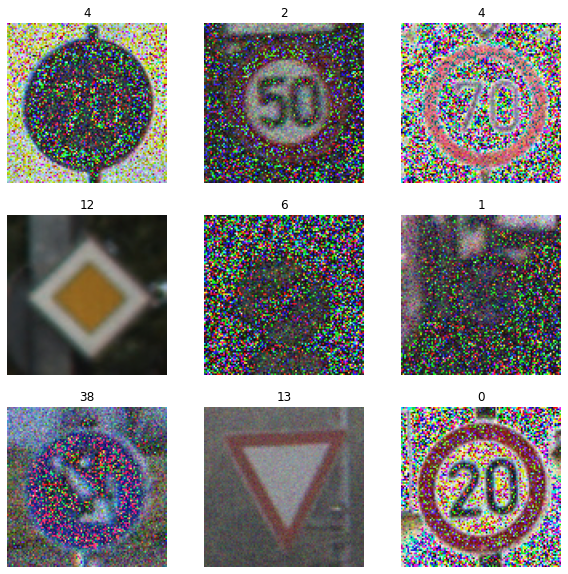

In [ ]:
# View 9 images and their class labels
plt.figure(figsize=(10, 10))
for images, labels in train_generator:
    for i in range(9):
        first_image = images.tolist()[i]      
        ax = plt.subplot(3, 3, i + 1)
        f = np.array(first_image)*255
        plt.imshow(f.astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
    break

In [ ]:
#model = tf.keras.models.Sequential([
    # This is the first convolution
#    tf.keras.layers.Conv2D(64, (3,3), activation=LeakyReLU(alpha=0.05), input_shape=(100,100,3)),
#    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
#    tf.keras.layers.Conv2D(64, (3,3), activation=LeakyReLU(alpha=0.05)),
#    tf.keras.layers.MaxPooling2D(2, 2),
    # The third convolution
#    tf.keras.layers.Conv2D(128, (3,3), activation=LeakyReLU(alpha=0.05)),
#    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
#    tf.keras.layers.Conv2D(128, (3,3), activation=LeakyReLU(alpha=0.05)),
#    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
#    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dropout(0.3),
    # 512 neuron hidden layer
#    tf.keras.layers.Dense(512, activation=LeakyReLU(alpha=0.05)),
#    tf.keras.layers.Dense(43, activation='softmax')
#])

In [ ]:
# Build a model...
model = tf.keras.applications.resnet.ResNet101(
    include_top=True, weights='imagenet', input_tensor=None,
    input_shape=None, pooling=None, classes=1000
)
# this right here with the model1 is an example of transfering 

179658752/179648224 [==============================] - 2s 0us/step


In [ ]:
# Layers for model
#model1 = keras.Sequential([
#    model,
#    keras.layers.Flatten(), # flatten transforms the format 
#    keras.layers.Dense(128, activation=tf.nn.relu),
#    keras.layers.Dense(10, activation=tf.nn.softmax)
#])

In [ ]:
# Layers for model
model1 = keras.Sequential([
    model,
    keras.layers.Flatten(), # flatten transforms the format 
    keras.layers.Dense(512, activation=LeakyReLU(alpha=0.05)),
    keras.layers.Dense(43, activation='softmax')
])

In [ ]:
model1.compile(optimizer="adam",
              loss= 'sparse_categorical_crossentropy',
              metrics=["sparse_categorical_accuracy"])

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#used-in-the-notebooks
model1.fit(
        train_generator,
        steps_per_epoch=400,
        epochs=40,
        validation_data=validation_generator)

Epoch 1/40
400/400 [==============================] - 251s 514ms/step - loss: 3.3511 - sparse_categorical_accuracy: 0.0998 - val_loss: 3.7573 - val_sparse_categorical_accuracy: 0.0476
Epoch 2/40
400/400 [==============================] - 212s 530ms/step - loss: 2.3527 - sparse_categorical_accuracy: 0.2578 - val_loss: 3.9481 - val_sparse_categorical_accuracy: 0.1486
Epoch 3/40
400/400 [==============================] - 202s 505ms/step - loss: 1.7686 - sparse_categorical_accuracy: 0.4032 - val_loss: 1.9677 - val_sparse_categorical_accuracy: 0.3859
Epoch 4/40
400/400 [==============================] - 203s 506ms/step - loss: 1.3375 - sparse_categorical_accuracy: 0.5156 - val_loss: 1.6032 - val_sparse_categorical_accuracy: 0.4871
Epoch 5/40
400/400 [==============================] - 203s 507ms/step - loss: 1.0652 - sparse_categorical_accuracy: 0.5965 - val_loss: 1.0815 - val_sparse_categorical_accuracy: 0.6289
Epoch 6/40
400/400 [==============================] - 204s 510ms/step - loss: 1.

## Testing the model
Once you have built and trained your model, the next step is to run the test images through it and see how well your model does at making predictions for images it has never seen before. 

Since loading these images and formatting them for the model can be tricky, you may find the following code useful. This code only uses your model to predict the class label for a given image. You'll still need to compare those predictions to the "ground truth" class labels in `test_classes.csv` to evaluate how well the model does.



```
from tensorflow.keras.preprocessing import image_dataset_from_directory
test_dir = '/content/'

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        classes=['test'],
        target_size=image_size,
        class_mode='sparse',
        shuffle=False)
probabilities = model.predict(test_generator)
predictions = [np.argmax(probas) for probas in probabilities]
```



In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
test_dir = '/content/'

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        classes=['test'],
        target_size=image_size,
        class_mode='sparse',
        shuffle=False)
probabilities = model1.predict(test_generator)
predictions = [np.argmax(probas) for probas in probabilities]

Found 12630 images belonging to 1 classes.


In [ ]:
predictions

[16,
 1,
 38,
 33,
 11,
 38,
 18,
 12,
 25,
 35,
 12,
 7,
 23,
 7,
 4,
 9,
 21,
 20,
 27,
 38,
 4,
 33,
 9,
 3,
 1,
 11,
 13,
 10,
 9,
 11,
 5,
 17,
 35,
 19,
 2,
 17,
 3,
 12,
 16,
 8,
 7,
 30,
 18,
 12,
 24,
 25,
 3,
 10,
 18,
 1,
 39,
 13,
 15,
 9,
 13,
 35,
 5,
 26,
 9,
 16,
 38,
 10,
 4,
 9,
 15,
 9,
 26,
 2,
 5,
 28,
 11,
 25,
 30,
 34,
 5,
 12,
 1,
 10,
 25,
 25,
 21,
 33,
 25,
 7,
 10,
 35,
 3,
 8,
 22,
 13,
 3,
 1,
 2,
 14,
 12,
 32,
 3,
 38,
 9,
 33,
 1,
 10,
 5,
 11,
 35,
 4,
 35,
 25,
 35,
 4,
 1,
 14,
 16,
 10,
 11,
 3,
 27,
 28,
 1,
 17,
 13,
 7,
 1,
 8,
 2,
 10,
 10,
 31,
 1,
 42,
 35,
 3,
 14,
 13,
 11,
 10,
 18,
 37,
 2,
 38,
 41,
 4,
 6,
 18,
 17,
 25,
 2,
 41,
 11,
 21,
 7,
 24,
 11,
 25,
 17,
 3,
 6,
 9,
 7,
 4,
 13,
 16,
 4,
 31,
 18,
 9,
 13,
 14,
 29,
 17,
 13,
 38,
 26,
 25,
 33,
 1,
 3,
 40,
 13,
 2,
 8,
 4,
 36,
 25,
 20,
 25,
 18,
 1,
 10,
 8,
 10,
 29,
 12,
 38,
 31,
 2,
 8,
 15,
 24,
 28,
 17,
 9,
 4,
 1,
 17,
 9,
 2,
 31,
 13,
 15,
 15,
 38,
 25,
 5,
 25,


In [ ]:
compare_data = pd.read_csv("/content/test_classes.csv")
compare_data

,Filename,ClassId
0,00000.jpg,16
1,00001.jpg,1
2,00002.jpg,38
3,00003.jpg,33
4,00004.jpg,11
...,...,...
12625,12625.jpg,12
12626,12626.jpg,33
12627,12627.jpg,6
12628,12628.jpg,7


In [ ]:
pred_list = list(predictions)
compare_data['predictions'] = pred_list

In [ ]:
round(sum(compare_data.correct_value)/len(correct_value),3)

0.902

In [ ]:

correct_value = []
for index, row in compare_data.iterrows():
  if row['ClassId'] == row['predictions']:
    correct_value.append(1)
  else:
    correct_value.append(0)
compare_data['correct_value'] = correct_value

In [ ]:
compare_data.to_csv('/content/drive/MyDrive/Machine Learning/predictions.csv', index = False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Hold out Dataset
For the previous modules, your team has turned in your predictions for us to evalutate. This time, you're given the answers to the hold out dataset and will need to perform your own evaluation. 

Once you have predictions, you'll need to compare those predictions against the "ground truth" class labels in `test_classes.csv` to evaluate how well the model does. 

Make sure to use the insights gained from the hold out dataset in your executive summary.